In [59]:
from tkinter import Tk
from tkinter import filedialog as fd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import viridis

from functions import *

In [60]:
messages = process_transcript_to_pandas()

In [61]:
# Assuming your dataframe is named df
substrings_to_keep = ['null', '<Media omitted>']

# Create a condition for each substring and combine them with the logical OR operator
condition = messages['contents'].str.contains('|'.join(substrings_to_keep))

# Filter rows where the 'contents' column contains any of the specified substrings
messages = messages[condition]

In [62]:
messages = messages.reset_index()

user_message_counts = messages['sender'].value_counts().reset_index()
user_message_counts.columns = ['sender', 'message_count']
user_message_df = pd.DataFrame(user_message_counts)

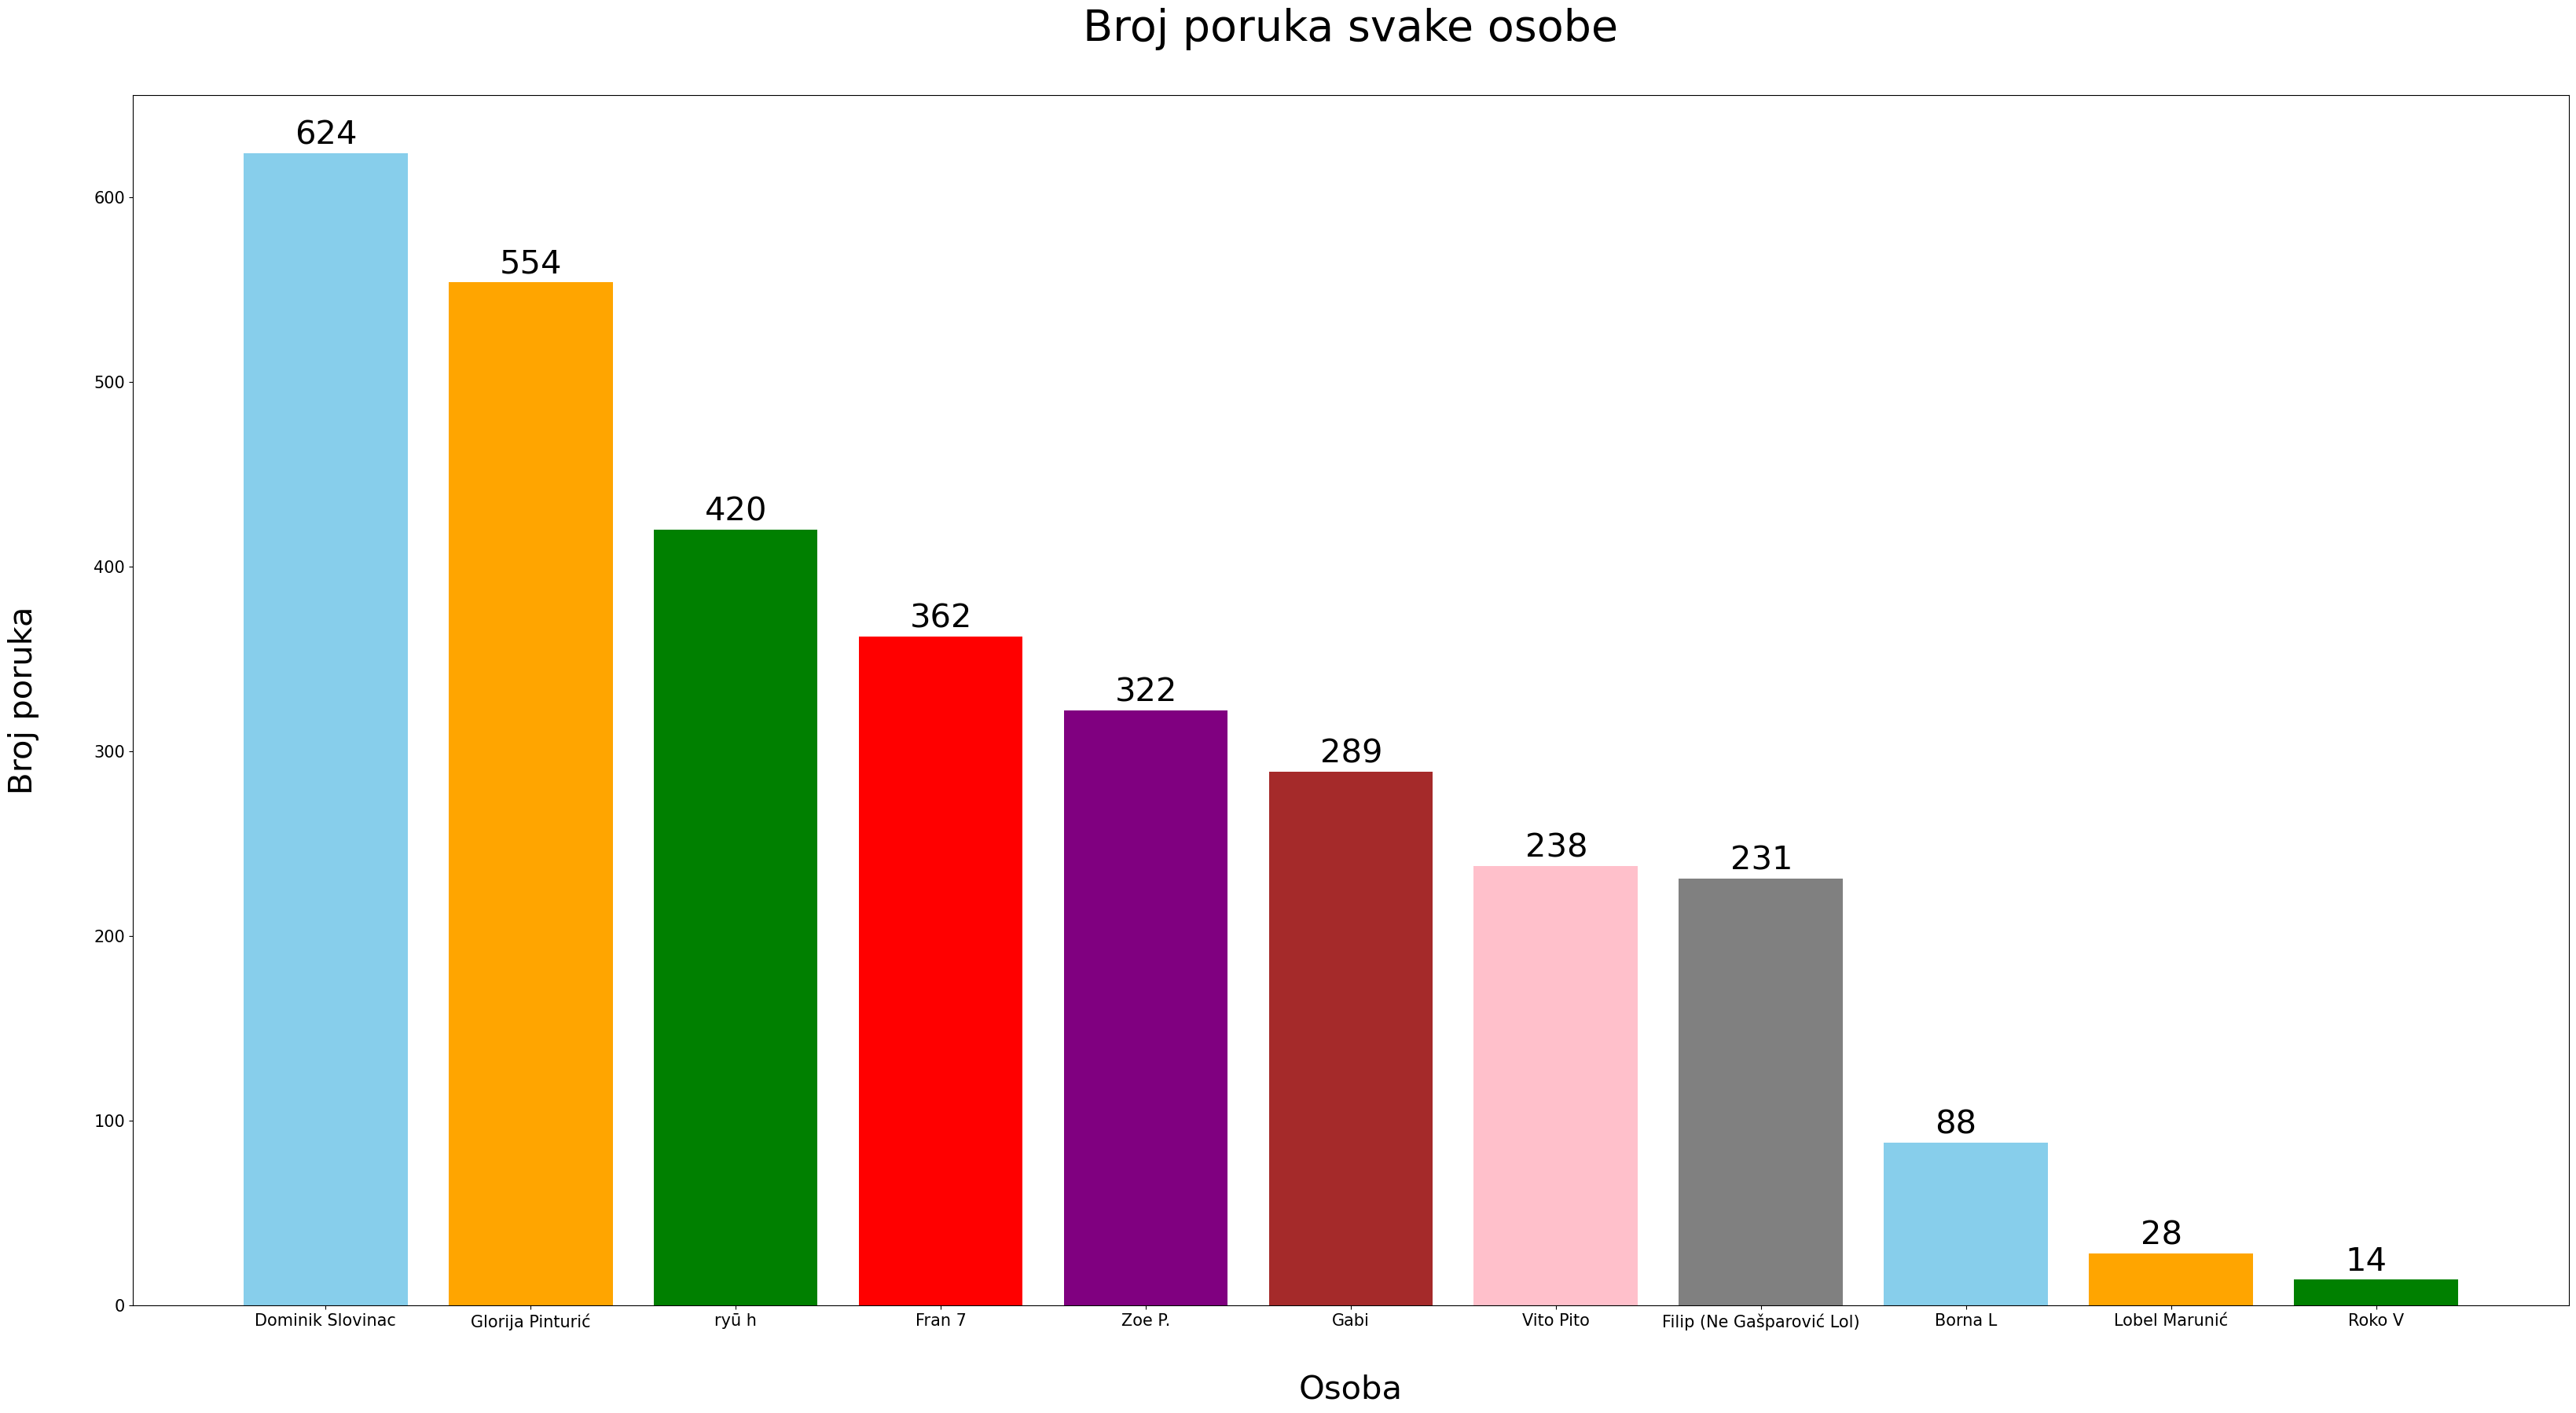

In [67]:
# Manually specify colors for each user
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

plt.figure(figsize=(40, 20))
bars = plt.bar(user_message_df['sender'], user_message_df['message_count'],  color=colors[:len(user_message_df)])
plt.xlabel('Osoba', fontsize=30, labelpad=40)  # Increase font size and set label padding for x-axis label
plt.ylabel('Broj poruka', fontsize=30, labelpad=50)  # Increase font size and set label padding for y-axis label
plt.title('Broj medijskih dokumenata svake osobe', fontsize=40, pad=50)  # Increase font size and set title padding

# Increase font size for x-axis and y-axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add value annotations on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 5, str(int(bar.get_height())),
             fontsize=30, color='black')

plt.show()